# Normy

## WHO
Normy stężeń pyłu zawieszonego zalecane przez Światową Organizację Zdrowia WHO:
- norma średniego 24-godz. stężenia pyłu PM10: 50 µg/m3
- norma średniego rocznego stężenia pyłu PM10: 20 µg/m3
- norma średniego 24-godz. stężenia pyłu PM2,5: 25 µg/m3
- norma średniego rocznego stężenia pyłu PM2,5: 10 µg/m3

## Polska
Normy dla mikropyłów PM10 ustalone są w Polsce (w oparciu o średnią dobową) na 3 poziomach:
- poziom dopuszczalny 50 µg/m3
- poziom informowania 200 µg/m3
- poziom alarmowy 300 µg/m3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify as mc

In [3]:
import os
os.chdir('C:\\Users\\Marta\\Desktop')

In [46]:
df = pd.read_excel('Zadanie1Smog.xlsx')

In [252]:
df.head(20)

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
5,2019-09-02,0,PM10,7.6287,50.768729,16.269677,Wałbrzych,Wałbrzych,DOLNOŚLĄSKIE
6,2019-09-02,0,PM2.5,7.1758,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
7,2019-09-02,0,PM2.5,3.4721,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE
8,2019-09-02,1,PM10,60.6054,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
9,2019-09-02,0,PM10,23.2100,53.012261,18.606203,Toruń,Toruń,KUJAWSKO-POMORSKIE


In [253]:
len(df.index)

452280

In [278]:
df['Wartosc'].describe()

count    451915.000000
mean         29.020155
std          26.582987
min        -131.354000
25%          13.244700
50%          22.194500
75%          35.900000
max         961.468000
Name: Wartosc, dtype: float64

In [254]:
dfNegative = df[df['Wartosc']<0]
dfNegative

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
2984,2019-09-12,2,PM10,-22.6640,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
3755,2019-09-14,13,PM10,-10.6657,50.592325,16.819786,Ząbkowice Śląskie,ząbkowicki,DOLNOŚLĄSKIE
16202,2019-10-06,8,PM2.5,-7.7100,52.053811,20.429892,Żyrardów,żyrardowski,MAZOWIECKIE
19847,2019-10-07,17,PM2.5,-14.0000,51.775411,19.450900,Łódź,Łódź,ŁÓDZKIE
23639,2019-10-08,17,PM10,-17.4172,50.018253,20.992578,Tarnów,Tarnów,MAŁOPOLSKIE
...,...,...,...,...,...,...,...,...,...
444151,2020-02-07,13,PM10,-2.1796,50.876983,18.416878,Olesno,oleski,OPOLSKIE
448077,2020-02-08,15,PM2.5,-19.6331,50.069308,20.053492,Kraków,Kraków,MAŁOPOLSKIE
449073,2020-02-08,20,PM10,-73.7856,50.098508,20.018269,Kraków,Kraków,MAŁOPOLSKIE
450049,2020-02-09,4,PM10,-41.5500,51.399084,21.147474,Radom,Radom,MAZOWIECKIE


In [47]:
df = df[df['Wartosc']>=0]
len(df.index)

451783

In [7]:
df1 = df[df['Parametr']=='PM10']
df2 = df[df['Parametr']=='PM2.5']

Pliki shp pobrane ze strony Głównego Urzędu Geodezji i Kartografii: http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

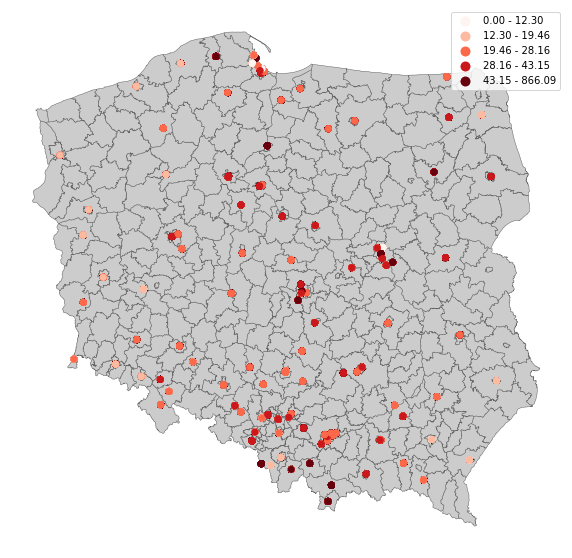

In [65]:
powiaty = gpd.read_file('jednostki_administracyjne//Powiaty.shp')

ax = powiaty.plot(linewidth=0.5, edgecolor='0.4', color='0.8', figsize=(10, 10))

gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.DlugGeo, df1.SzerGeo))
gdf.plot(ax=ax, column='Wartosc', scheme='Quantiles', cmap='Reds', legend=True)

ax.axis('off')
ax.set_aspect('auto')

In [66]:
df = df.drop(['Godzina', 'Miasto', 'Wojewodztwo'], axis=1)

In [282]:
df['Data'].describe()

count                  451783
unique                    161
top       2019-11-07 00:00:00
freq                     3829
first     2019-09-02 00:00:00
last      2020-02-09 00:00:00
Name: Data, dtype: object

In [11]:
grouped1 = df1.groupby(['Powiat', 'Data']).mean()
grouped2 = df2.groupby(['Powiat', 'Data']).mean()

Text(0.5, 1.0, 'Ilość dni z przekroczoną normą PM10')

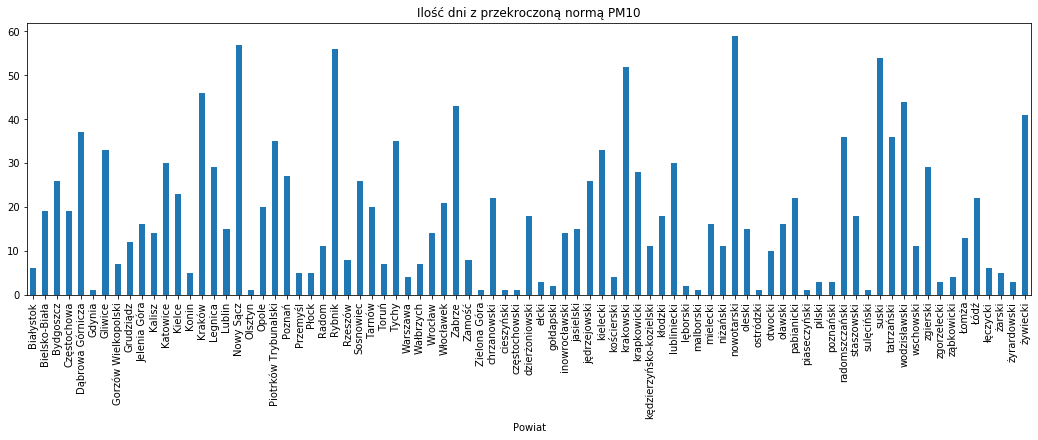

In [342]:
avg1Over = grouped1[grouped1['Wartosc'] > 50]
avg1OverCount = avg1Over['Wartosc'].groupby(['Powiat']).count()
avg1OverCount.plot.bar(figsize=(18, 5))
plt.title('Ilość dni z przekroczoną normą PM10')

In [233]:
df2['Wartosc'].describe()

count    127950.000000
mean         24.056221
std          19.807399
min           0.000000
25%          11.560000
50%          19.573750
75%          30.400000
max         961.468000
Name: Wartosc, dtype: float64

Text(0.5, 1.0, 'Ilość dni z przekroczoną normą PM2.5')

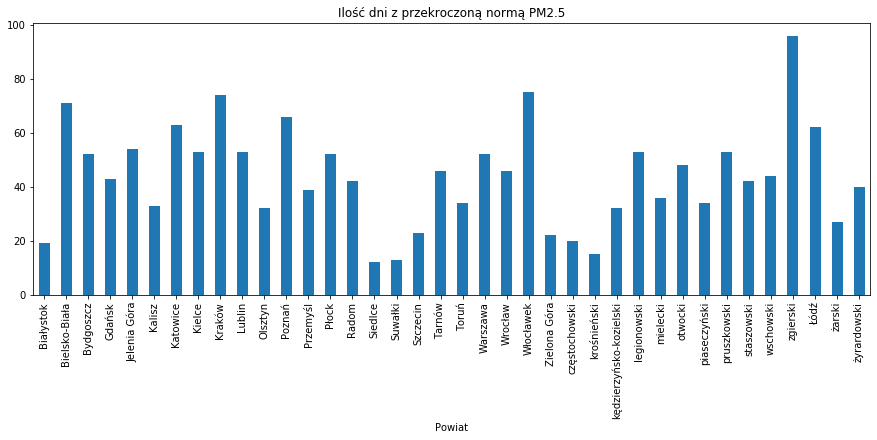

In [288]:
avg2Over = grouped2[grouped2['Wartosc'] > 25]
avg2Over['Wartosc'].groupby(['Powiat']).count().plot.bar(figsize=(15, 5))
plt.title('Ilość dni z przekroczoną normą PM2.5')

In [69]:
powiaty1 = grouped1.groupby('Powiat').mean()
powiaty2 = grouped2.groupby('Powiat').mean()

In [73]:
gdf1 = gpd.GeoDataFrame(powiaty1, geometry=gpd.points_from_xy(powiaty1.DlugGeo, powiaty1.SzerGeo))
mc.UserDefined(gdf1['Wartosc'], bins = [10, 20, 30, 40])

UserDefined           

   Interval      Count
----------------------
( -inf, 10.00] |     0
(10.00, 20.00] |     9
(20.00, 30.00] |    43
(30.00, 40.00] |    25
(40.00, 72.42] |    16

Text(0.5, 1, 'Średnie wartości PM10 w badanych powiatach')

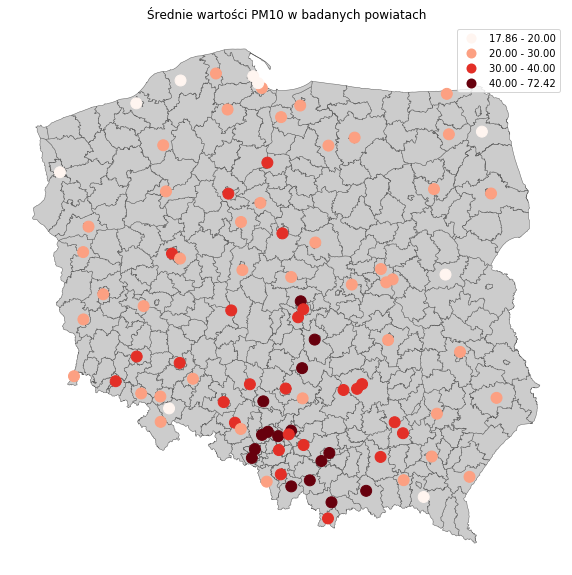

In [75]:
ax = powiaty.plot(linewidth=0.5, edgecolor='0.4', color='0.8', figsize=(10, 10))

gdf1.plot(ax=ax, column='Wartosc', scheme='UserDefined', classification_kwds={'bins':[20, 30, 40]}, 
          cmap='Reds', legend=True, markersize = 120)

ax.axis('off')
ax.set_aspect('auto')
plt.title('Średnie wartości PM10 w badanych powiatach')

In [70]:
gdf2 = gpd.GeoDataFrame(powiaty2, geometry=gpd.points_from_xy(powiaty2.DlugGeo, powiaty2.SzerGeo))
mc.UserDefined(gdf2['Wartosc'], bins = [15, 25, 35])

UserDefined           

   Interval      Count
----------------------
[14.23, 15.00] |     2
(15.00, 25.00] |    22
(25.00, 35.00] |    12
(35.00, 36.78] |     2

Text(0.5, 1, 'Średnie wartości PM2.5 w badanych powiatach')

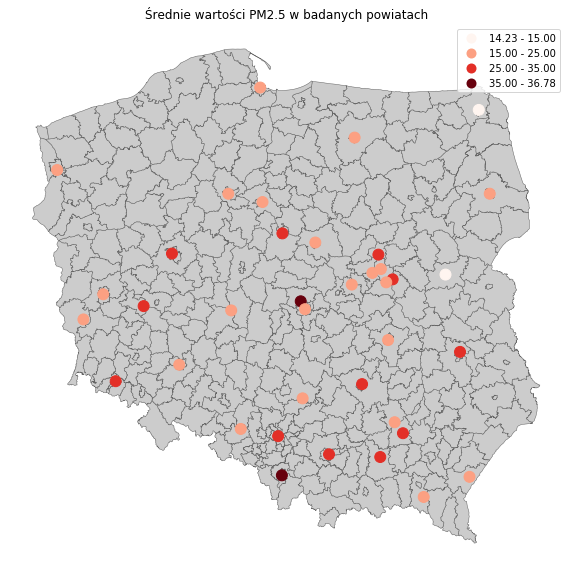

In [76]:
ax = powiaty.plot(linewidth=0.5, edgecolor='0.4', color='0.8', figsize=(10, 10))

gdf2.plot(ax=ax, column='Wartosc', scheme='UserDefined', classification_kwds={'bins':[15, 25, 35]}, 
          cmap='Reds', legend=True, markersize = 120)

ax.axis('off')
ax.set_aspect('auto')
plt.title('Średnie wartości PM2.5 w badanych powiatach')

In [42]:
miesiace1 = df
miesiace1['Miesiac'] = df['Data'].dt.month
miesiace1.drop(['Data', 'SzerGeo', 'DlugGeo'], axis = 1)

,Parametr,Wartosc,Powiat,Miesiac
0,PM10,27.8500,inowrocławski,9
1,PM10,24.7769,zgorzelecki,9
2,PM10,7.9492,dzierżoniowski,9
3,PM10,8.6594,kłodzki,9
4,PM10,16.6597,oławski,9
...,...,...,...,...
452275,PM10,33.3700,Kielce,2
452276,PM2.5,26.1200,Kielce,2
452277,PM2.5,30.7245,Poznań,2
452278,PM10,22.3649,lubliniecki,2


Text(0.5, 1.0, 'Średnia miesięczna dla PM10')

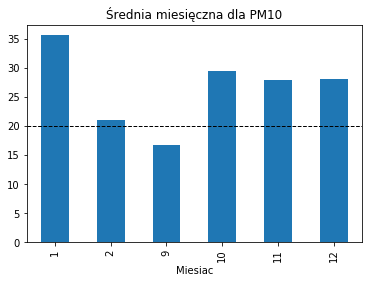

In [63]:
sredniaM1 = miesiace.groupby('Miesiac').mean()
sredniaM1['Wartosc'].plot.bar()
plt.axhline(y=20,linewidth=1, color='k', linestyle='--')
plt.title("Średnia miesięczna dla PM10")

In [44]:
miesiace2 = df
miesiace2['Miesiac'] = df['Data'].dt.month
miesiace2.drop(['Data', 'SzerGeo', 'DlugGeo'], axis = 1)

,Parametr,Wartosc,Powiat,Miesiac
0,PM10,27.8500,inowrocławski,9
1,PM10,24.7769,zgorzelecki,9
2,PM10,7.9492,dzierżoniowski,9
3,PM10,8.6594,kłodzki,9
4,PM10,16.6597,oławski,9
...,...,...,...,...
452275,PM10,33.3700,Kielce,2
452276,PM2.5,26.1200,Kielce,2
452277,PM2.5,30.7245,Poznań,2
452278,PM10,22.3649,lubliniecki,2


Text(0.5, 1.0, 'Średnia miesięczna dla PM2.5')

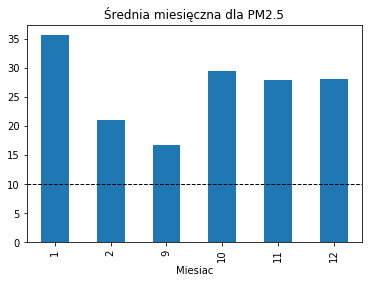

In [62]:
sredniaM2 = miesiace.groupby('Miesiac').mean()
sredniaM2['Wartosc'].plot.bar()
plt.axhline(y=10, linewidth=1, color='k', linestyle='--')
plt.title("Średnia miesięczna dla PM2.5")